In [1]:
import pandas as pd

df = pd.read_excel('validacion/analisis_diferencia_U_Mann_Whitney.xlsx')
df.head()

,Estacion,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,PUERTO INIRIDA - AUT [31095030],0.258791,2.448850e-01,0.489005,5.306354e-01,0.046653,0.065371,0.146020,0.402898,0.013715,5.102458e-01,1.733291e-01,7.314929e-01
1,MODULOS - AUT [35225030],0.967319,7.786450e-01,0.551902,9.322709e-01,0.647124,0.069713,0.368344,0.934813,0.151045,8.820383e-01,6.674027e-01,2.045877e-01
2,AEROPUERTO YOPAL - AUT [35215020],0.307209,3.491774e-01,0.674689,5.377488e-01,0.652925,0.769150,0.056076,0.368610,0.100791,2.288791e-01,9.883084e-02,5.601932e-02
3,TOQUILLA - AUT [35195060],0.000023,1.663718e-08,0.000173,4.164042e-07,0.000003,0.196111,0.458133,0.569982,0.028073,1.273291e-07,6.814962e-09,3.109670e-07
4,LA LIBERTAD - AUT [35025110],0.019360,1.562052e-01,0.169684,5.473400e-03,0.000163,0.000209,0.000008,0.000004,0.006992,1.132825e-04,2.676965e-04,5.032282e-03


Archivo 'validacion/analisis_diferencia_U_Mann_Whitney.xlsx' cargado exitosamente.

El gráfico se ha guardado como 'p_values_plot_updated.png'


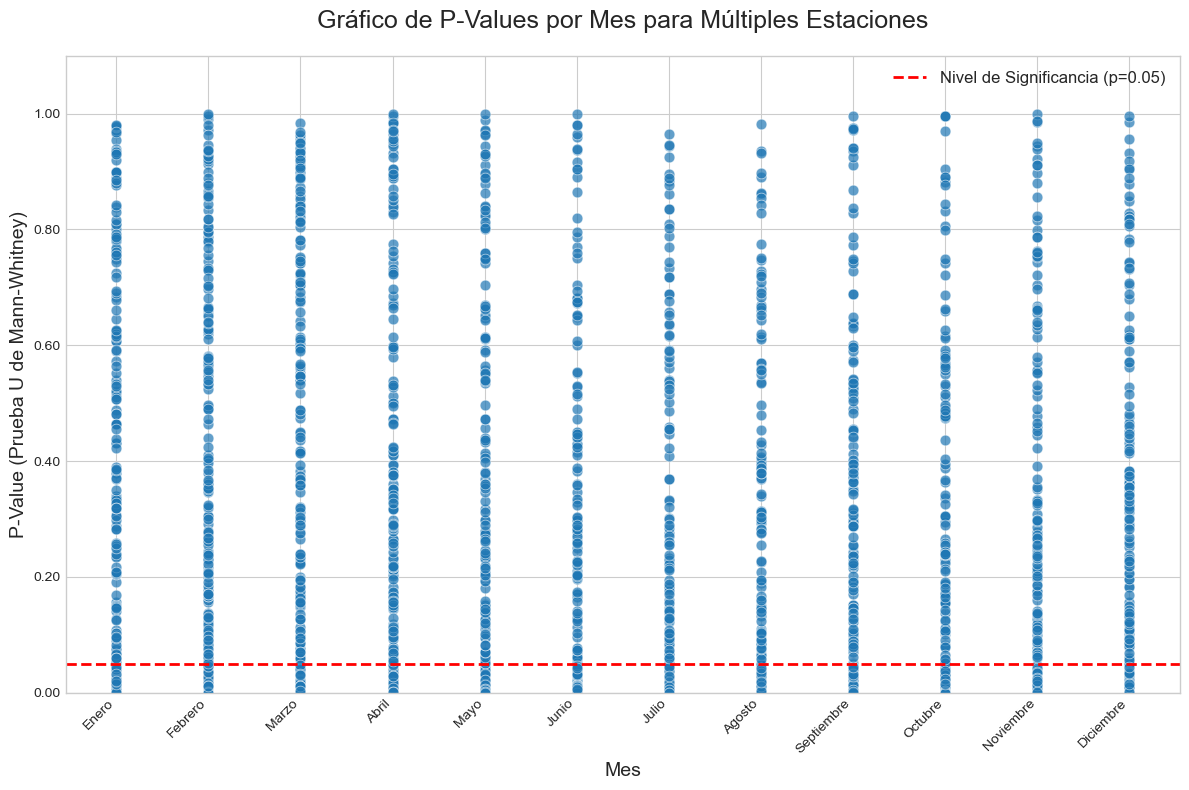

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import sys

# Load the data from the specified Excel file path
try:
    # Updated file path as per your request
    df = pd.read_excel('validacion/analisis_diferencia_U_Mann_Whitney.xlsx')
    print("Archivo 'validacion/analisis_diferencia_U_Mann_Whitney.xlsx' cargado exitosamente.")
except FileNotFoundError:
    # Friendly error message if the file is not found at the specified path
    print("Error: No se pudo encontrar el archivo en la ruta 'validacion/analisis_diferencia_U_Mann_Whitney.xlsx'.")
    print("Por favor, asegúrate de que la carpeta 'validacion' y el archivo 'analisis_diferencia_U_Mann_Whitney.xlsx' existan.")
    # Exit the script if the file is not found
    sys.exit()


# Melt the dataframe to a long format suitable for plotting
# This transforms the data so there's one row per station per month
df_melted = df.melt(id_vars=['Estacion'], var_name='Mes', value_name='p_value')

# Define the correct order for the months for chronological plotting
month_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_melted['Mes'] = pd.Categorical(df_melted['Mes'], categories=month_order, ordered=True)

# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Create the scatter plot with the p-values
# Each point represents a p-value for a station in a specific month
ax.scatter(df_melted['Mes'], df_melted['p_value'], alpha=0.7, s=60, edgecolors='w', linewidth=0.5)

# Add the horizontal line for the 0.05 significance level
ax.axhline(y=0.05, color='r', linestyle='--', linewidth=2, label='Nivel de Significancia (p=0.05)')

# --- Customization and Labels ---
ax.set_title('Gráfico de P-Values por Mes para Múltiples Estaciones', fontsize=18, pad=20)
ax.set_xlabel('Mes', fontsize=14)
ax.set_ylabel('P-Value (Prueba U de Mann-Whitney)', fontsize=14)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
ax.legend(fontsize=12)

# Set y-axis limits and format ticks
ax.set_ylim(0, max(df_melted['p_value'].max() * 1.1, 0.1)) # Adjust y-limit based on data
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

# Ensure everything fits without overlapping
plt.tight_layout()

# Save the plot to a file
plt.savefig('p_values_plot_updated.png', dpi=300)

print("\nEl gráfico se ha guardado como 'p_values_plot_updated.png'")


Archivo 'validacion/analisis_diferencia_U_Mann_Whitney.xlsx' cargado exitosamente.

--- Análisis de Porcentaje de P-Values (Significancia = 0.05) ---

Resultados para Enero:
  - Puntos totales: 226
  - Porcentaje por debajo de 0.05 (significativo): 29.65%
  - Porcentaje por encima o igual a 0.05 (no significativo): 70.35%

Resultados para Febrero:
  - Puntos totales: 226
  - Porcentaje por debajo de 0.05 (significativo): 23.89%
  - Porcentaje por encima o igual a 0.05 (no significativo): 76.11%

Resultados para Marzo:
  - Puntos totales: 226
  - Porcentaje por debajo de 0.05 (significativo): 28.32%
  - Porcentaje por encima o igual a 0.05 (no significativo): 71.68%

Resultados para Abril:
  - Puntos totales: 226
  - Porcentaje por debajo de 0.05 (significativo): 36.28%
  - Porcentaje por encima o igual a 0.05 (no significativo): 63.72%

Resultados para Mayo:
  - Puntos totales: 226
  - Porcentaje por debajo de 0.05 (significativo): 41.15%
  - Porcentaje por encima o igual a 0.05 (no si

c:\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



El gráfico de violín se ha guardado como 'p_values_violin_plot.png'


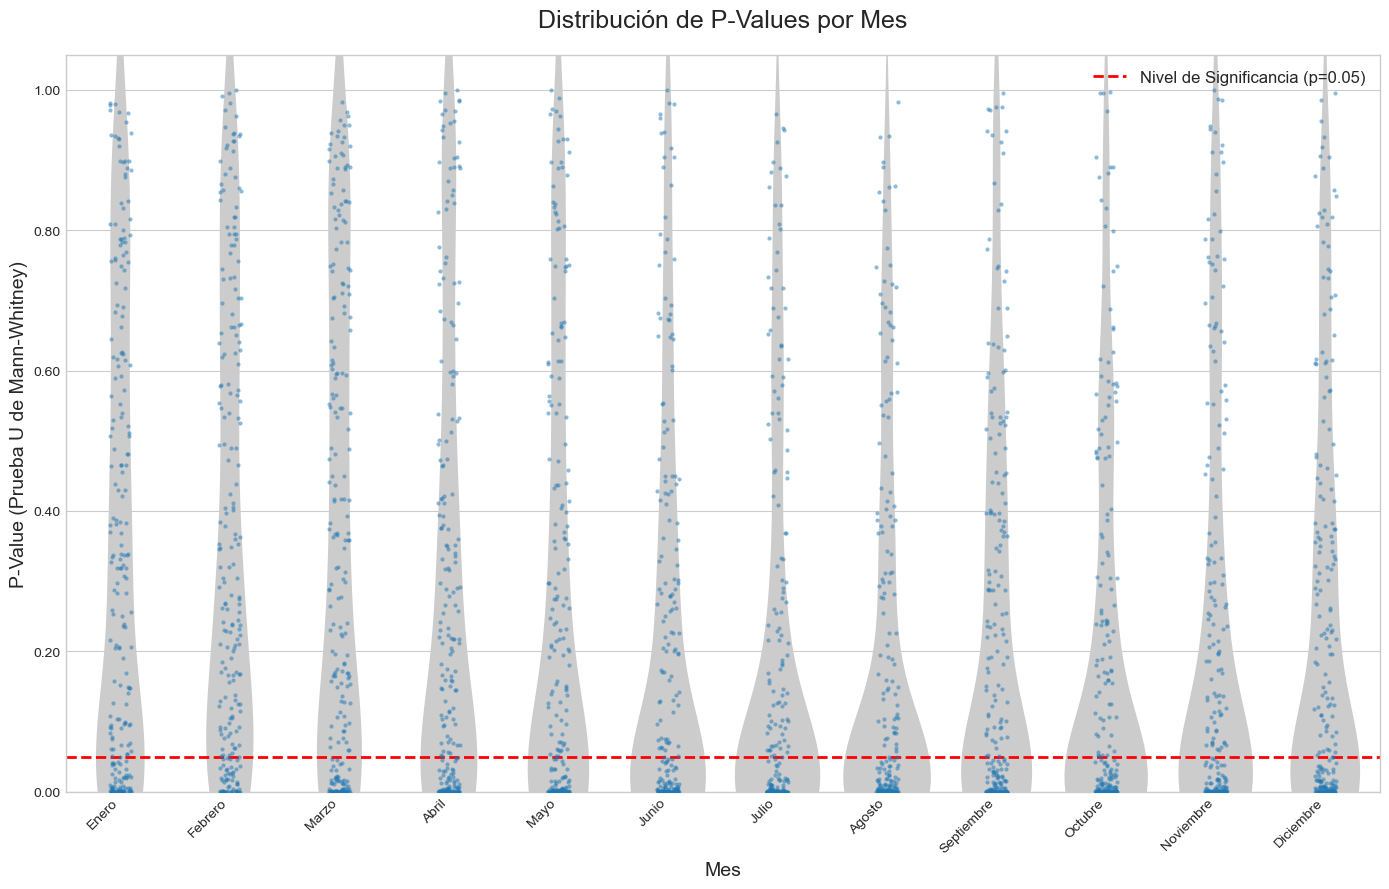

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import sys

# Load the data from the specified Excel file path
try:
    df = pd.read_excel('validacion/analisis_diferencia_U_Mann_Whitney.xlsx')
    print("Archivo 'validacion/analisis_diferencia_U_Mann_Whitney.xlsx' cargado exitosamente.")
except FileNotFoundError:
    print("Error: No se pudo encontrar el archivo en la ruta 'validacion/analisis_diferencia_U_Mann_Whitney.xlsx'.")
    print("Por favor, asegúrate de que la carpeta 'validacion' y el archivo 'analisis_diferencia_U_Mann_Whitney.xlsx' existan.")
    sys.exit()

# Melt the dataframe to a long format suitable for plotting
df_melted = df.melt(id_vars=['Estacion'], var_name='Mes', value_name='p_value')

# Define the correct order for the months for chronological plotting
month_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_melted['Mes'] = pd.Categorical(df_melted['Mes'], categories=month_order, ordered=True)

# --- Percentage Calculation ---
# This new section calculates and prints the statistics for each month.
print("\n--- Análisis de Porcentaje de P-Values (Significancia = 0.05) ---")
for month in month_order:
    # Filter data for the current month
    month_data = df_melted[df_melted['Mes'] == month]
    
    if not month_data.empty:
        # Calculate counts
        total_count = len(month_data)
        below_threshold = (month_data['p_value'] < 0.05).sum()
        above_threshold = total_count - below_threshold
        
        # Calculate percentages
        percent_below = (below_threshold / total_count) * 100
        percent_above = (above_threshold / total_count) * 100
        
        # Print the results for the month
        print(f"\nResultados para {month}:")
        print(f"  - Puntos totales: {total_count}")
        print(f"  - Porcentaje por debajo de 0.05 (significativo): {percent_below:.2f}%")
        print(f"  - Porcentaje por encima o igual a 0.05 (no significativo): {percent_above:.2f}%")

# --- Plotting ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 9))

# Create the violin plot to show the distribution density
sns.violinplot(x='Mes', y='p_value', data=df_melted, ax=ax, inner=None, color=".8", linewidth=0)

# Overlay a stripplot to show individual data points with jitter
sns.stripplot(x='Mes', y='p_value', data=df_melted, ax=ax, size=3, jitter=True, alpha=0.5)

# Add the horizontal line for the 0.05 significance level
ax.axhline(y=0.05, color='r', linestyle='--', linewidth=2, label='Nivel de Significancia (p=0.05)')

# --- Customization and Labels ---
ax.set_title('Distribución de P-Values por Mes', fontsize=18, pad=20)
ax.set_xlabel('Mes', fontsize=14)
ax.set_ylabel('P-Value (Prueba U de Mann-Whitney)', fontsize=14)
plt.xticks(rotation=45, ha='right')
ax.legend(fontsize=12)

# Set y-axis limits
ax.set_ylim(bottom=0)
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

# Ensure everything fits without overlapping
plt.tight_layout()

# Save the plot to a file
plt.savefig('p_values_violin_plot.png', dpi=300)

print("\nEl gráfico de violín se ha guardado como 'p_values_violin_plot.png'")


--- Iniciando el análisis con la prueba t de Student ---
ℹ️ Se encontraron 226 estaciones en común para analizar.
✅ Análisis de p-values completado. Resultados guardados en: 'validacion\analisis_diferencia_ttest.xlsx'

--- Creando la tabla de resumen de significancia ---
--- Resumen de Conteo de P-Values por Mes ---
            Valores <= 0.05 (Significativo)  Valores > 0.05 (No Significativo)
Enero                                    66                                160
Febrero                                  52                                174
Marzo                                    67                                159
Abril                                    78                                148
Mayo                                     95                                131
Junio                                   110                                116
Julio                                   119                                107
Agosto                                  109       

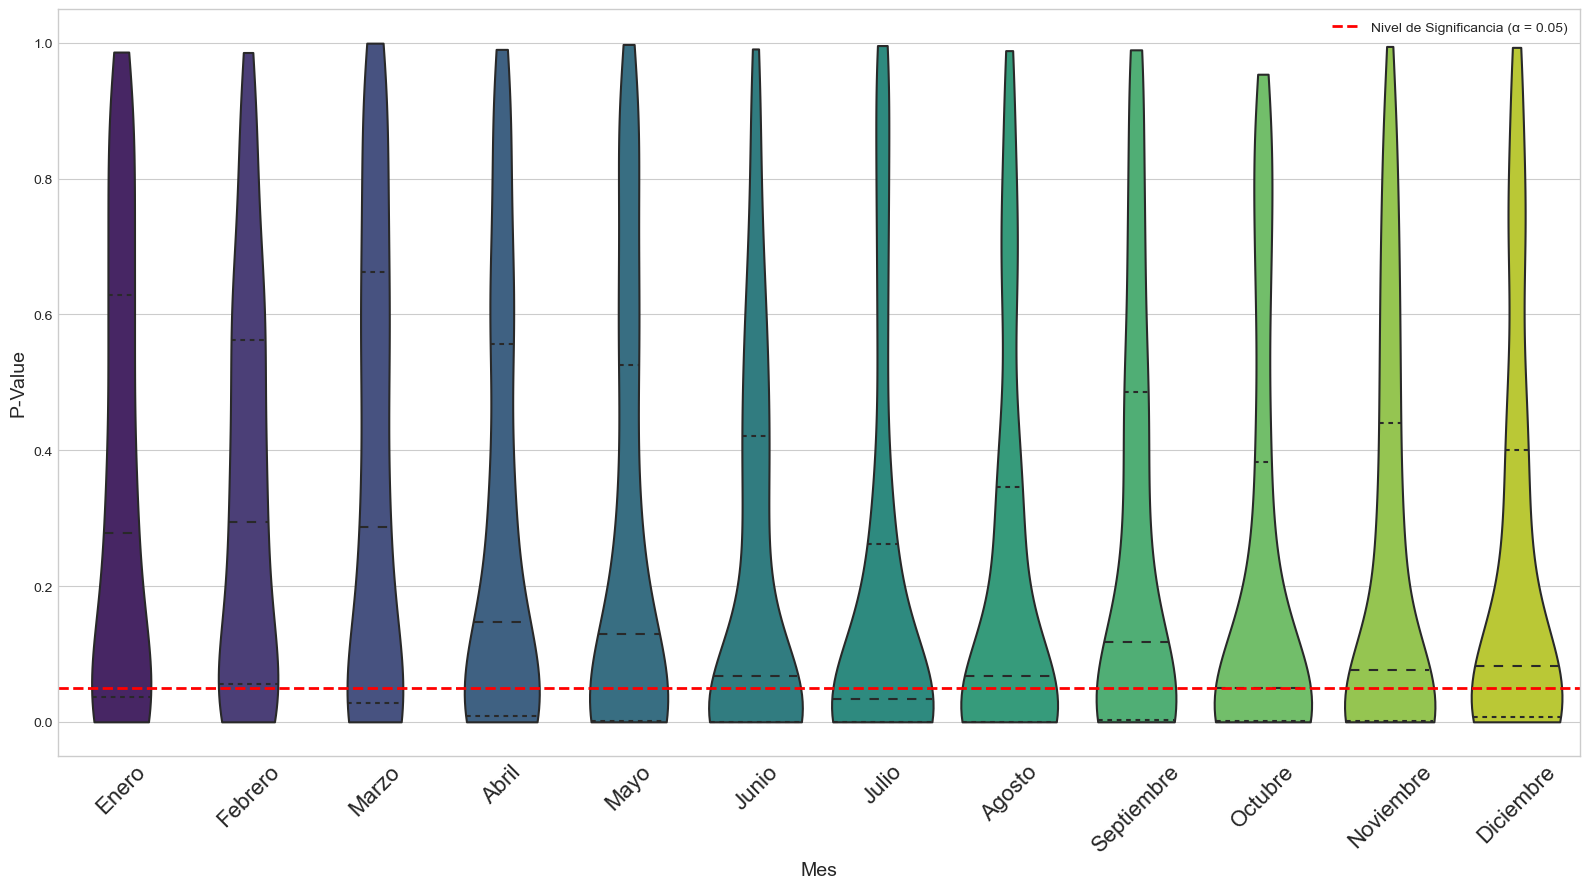

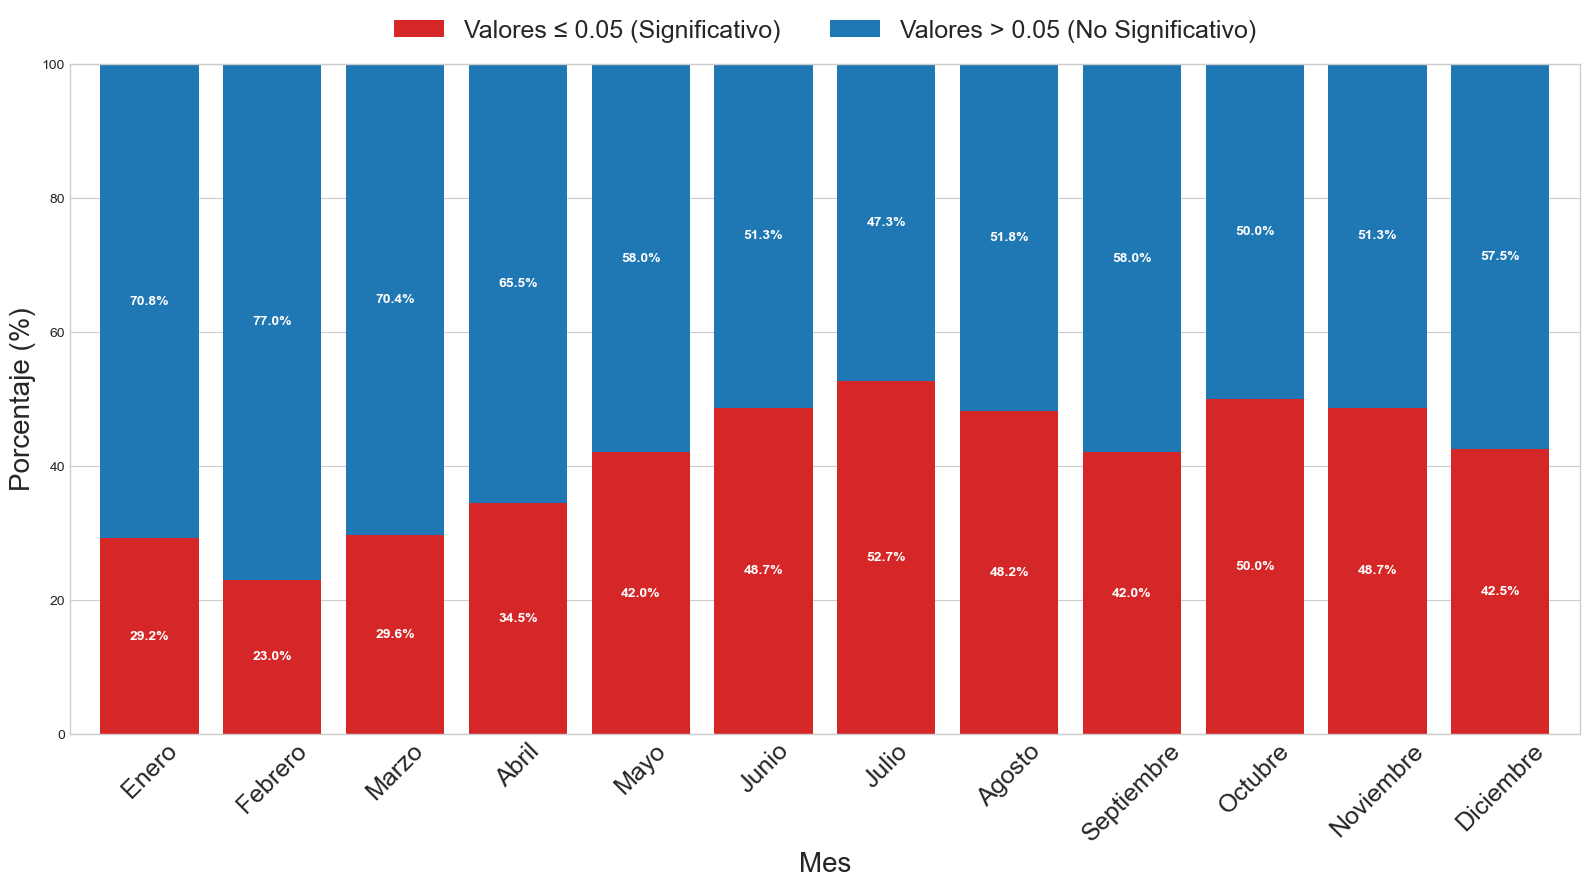

In [ ]:
################################################################################
# SCRIPT COMPLETO PARA ANÁLISIS DE DIFERENCIAS CON PRUEBA T-STUDENT,
# TABLA DE RESUMEN Y VISUALIZACIÓN DE RESULTADOS (VERSIÓN CORREGIDA)
################################################################################

import pandas as pd
from scipy import stats
import os
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CONFIGURACIÓN INICIAL ---
# Define las rutas de los archivos y carpetas.
# Asegúrate de que tus archivos Excel estén en la carpeta 'datos_analisis'.
IDEAM_FILE_PATH = 'datos_analisis/precipitacion_mensual_ideam.xlsx'
CHIRPS_FILE_PATH = 'datos_analisis/pp_mes_chirps.xlsx'
OUTPUT_FOLDER = 'validacion'

# Crear carpetas de salida si no existen
if not os.path.exists('datos_analisis'):
    os.makedirs('datos_analisis')
    print("⚠️ Advertencia: La carpeta 'datos_analisis' no existía y ha sido creada.")
    print("   Por favor, asegúrate de colocar tus archivos 'precipitacion_mensual_ideam.xlsx' y 'pp_mes_chirps.xlsx' dentro de ella.")

if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

# --- 2. ANÁLISIS CON PRUEBA T-STUDENT ---
print("--- Iniciando el análisis con la prueba t de Student ---")

try:
    df_ideam = pd.read_excel(IDEAM_FILE_PATH)
    df_chirps = pd.read_excel(CHIRPS_FILE_PATH)
except FileNotFoundError:
    print(f"❌ Error Crítico: No se encontró uno o ambos archivos de datos en la carpeta 'datos_analisis'.")
    print(f"   - Buscando: '{IDEAM_FILE_PATH}'")
    print(f"   - Buscando: '{CHIRPS_FILE_PATH}'")
    exit() # Termina el script si los archivos no existen

# Procesamiento de fechas
try:
    df_ideam['Fecha'] = pd.to_datetime(df_ideam['Fecha'])
    df_chirps['Fecha'] = pd.to_datetime(df_chirps['Fecha'])
    df_ideam.set_index('Fecha', inplace=True)
    df_chirps.set_index('Fecha', inplace=True)
except KeyError:
    print("❌ Error Crítico: No se encontró una columna llamada 'Fecha' en uno de los archivos. Por favor, revisa tus Excel.")
    exit()

common_stations = df_ideam.columns.intersection(df_chirps.columns)
print(f"ℹ️ Se encontraron {len(common_stations)} estaciones en común para analizar.")

p_values_results = pd.DataFrame(index=common_stations, columns=range(1, 13))

for station in common_stations:
    combined = pd.concat([df_ideam[station], df_chirps[station]], axis=1)
    combined.columns = ['IDEAM', 'CHIRPS']
    combined.dropna(inplace=True)

    for month in range(1, 13):
        ideam_month = combined[combined.index.month == month]['IDEAM']
        chirps_month = combined[combined.index.month == month]['CHIRPS']

        if len(ideam_month) < 2 or len(chirps_month) < 2:
            p_values_results.loc[station, month] = None
            continue
        
        try:
            t_stat, p_value = stats.ttest_ind(ideam_month, chirps_month, equal_var=False)
            p_values_results.loc[station, month] = p_value
        except ValueError:
            p_values_results.loc[station, month] = 1.0

# Formatear y guardar los p-values
p_values_results.columns = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
output_pvalues_path = os.path.join(OUTPUT_FOLDER, 'analisis_diferencia_ttest.xlsx')
try:
    p_values_results.to_excel(output_pvalues_path)
    print(f"✅ Análisis de p-values completado. Resultados guardados en: '{output_pvalues_path}'")
except PermissionError:
    print(f"❌ Error de Permiso al guardar p-values: No se pudo escribir en '{output_pvalues_path}'.")
    print("   Asegúrate de que el archivo no esté abierto y de que tienes permisos para escribir en la carpeta 'validacion'.")
    exit()


# --- 3. CREACIÓN DE LA TABLA DE RESUMEN DE CONTEO ---
print("\n--- Creando la tabla de resumen de significancia ---")

summary_data = {
    'Valores <= 0.05 (Significativo)': [],
    'Valores > 0.05 (No Significativo)': []
}
months = p_values_results.columns.tolist()

for month in months:
    below_or_equal = (p_values_results[month] <= 0.05).sum()
    above = (p_values_results[month] > 0.05).sum()
    summary_data['Valores <= 0.05 (Significativo)'].append(below_or_equal)
    summary_data['Valores > 0.05 (No Significativo)'].append(above)

df_summary = pd.DataFrame(summary_data, index=months)
output_summary_path = os.path.join(OUTPUT_FOLDER, 'resumen_significancia_conteo.xlsx')

try:
    df_summary.to_excel(output_summary_path)
    print("--- Resumen de Conteo de P-Values por Mes ---")
    print(df_summary)
    print(f"\n✅ Tabla de resumen exportada exitosamente como: '{output_summary_path}'")
except PermissionError:
    print(f"❌ Error de Permiso al guardar el resumen: No se pudo escribir en '{output_summary_path}'.")
    print("   Por favor, asegúrate de que el archivo no esté abierto en Excel u otro programa y vuelve a intentarlo.")


# --- 4. GENERACIÓN DEL GRÁFICO DE VIOLÍN ---
print("\n--- Generando el gráfico de violín ---")

p_values_melted = p_values_results.melt(var_name='Mes', value_name='P-Value')
p_values_melted.dropna(subset=['P-Value'], inplace=True)
p_values_melted['P-Value'] = pd.to_numeric(p_values_melted['P-Value'])

if p_values_melted.empty:
    print("⚠️ Advertencia: No hay datos de p-values para graficar. Se omitirá la creación del gráfico.")
else:
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(16, 9))
    
    sns.violinplot(data=p_values_melted, x='Mes', y='P-Value', ax=ax, palette='viridis', inner='quartile', order=months, cut=0)
    
    ax.set_ylim(-0.05, 1.05)
    
    ax.axhline(0.05, ls='--', color='red', lw=2, label='Nivel de Significancia (α = 0.05)')
    # Se elimina el título del gráfico de violín
    # ax.set_title('Distribución de P-Values Mensuales (Prueba t-Student)', fontsize=20, pad=20)
    ax.set_xlabel('Mes', fontsize=14)
    ax.set_ylabel('P-Value', fontsize=14)
    ax.tick_params(axis='x', labelrotation=45, labelsize=16)
    ax.legend()
    plt.tight_layout()

    output_plot_path = os.path.join(OUTPUT_FOLDER, 'figuras/grafico_violines_p_values.png')
    try:
        plt.savefig(output_plot_path, dpi=300)
        print(f"✅ Gráfico de violín guardado exitosamente como: '{output_plot_path}'")
    except PermissionError:
        print(f"❌ Error de Permiso al guardar el gráfico: No se pudo escribir en '{output_plot_path}'.")
        print("   Asegúrate de que tienes permisos para escribir en la carpeta 'validacion'.")


# --- 5. GENERACIÓN DEL GRÁFICO DE BARRAS PORCENTUAL ---
print("\n--- Generando el gráfico de barras porcentual ---")

# Calcular el total de p-values no nulos por mes para el denominador
df_summary['Total'] = df_summary['Valores <= 0.05 (Significativo)'] + df_summary['Valores > 0.05 (No Significativo)']

# Calcular los porcentajes
df_summary['Porcentaje Significativo'] = (df_summary['Valores <= 0.05 (Significativo)'] / df_summary['Total']) * 100
df_summary['Porcentaje No Significativo'] = (df_summary['Valores > 0.05 (No Significativo)'] / df_summary['Total']) * 100

# Preparar los datos para el gráfico de barras apiladas
df_plot = df_summary[['Porcentaje Significativo', 'Porcentaje No Significativo']]

# Crear el gráfico
fig_bar, ax_bar = plt.subplots(figsize=(16, 9))
df_plot.plot(
    kind='bar',
    stacked=True,
    ax=ax_bar,
    color=['#d62728', '#1f77b4'], # Rojo para significativo, Azul para no significativo
    width=0.8
)

# Personalizar el gráfico
# Se elimina el título del gráfico de barras
# ax_bar.set_title('Comparación Porcentual de Significancia por Mes', fontsize=20, pad=20)
ax_bar.set_xlabel('Mes', fontsize=20)
ax_bar.set_ylabel('Porcentaje (%)', fontsize=20)
ax_bar.tick_params(axis='x', labelrotation=45, labelsize=18)
ax_bar.set_ylim(0, 100) # El eje Y va de 0 a 100%

# Añadir etiquetas de porcentaje en las barras
for c in ax_bar.containers:
    # Formatear la etiqueta para mostrar el porcentaje con un decimal
    labels = [f'{w:.1f}%' if w > 5 else '' for w in c.datavalues] # No mostrar etiquetas para valores muy pequeños
    ax_bar.bar_label(c, labels=labels, label_type='center', color='white', fontsize=10, fontweight='bold')

# Se modifica la leyenda para que aparezca arriba, sin título y en horizontal
ax_bar.legend(
    ['Valores ≤ 0.05 (Significativo)', 'Valores > 0.05 (No Significativo)'],
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.1), # Posición sobre el gráfico
    ncol=2, # Número de columnas para la leyenda
    frameon=False, # Sin borde
    fontsize=18
)
plt.tight_layout() # Ajustar layout para que la leyenda no se corte

# Guardar el gráfico
output_bar_plot_path = os.path.join(OUTPUT_FOLDER, 'figuras/grafico_barras_porcentual.png')
try:
    plt.savefig(output_bar_plot_path, dpi=300)
    print(f"✅ Gráfico de barras porcentual guardado exitosamente como: '{output_bar_plot_path}'")
except PermissionError:
    print(f"❌ Error de Permiso al guardar el gráfico de barras: No se pudo escribir en '{output_bar_plot_path}'.")

print("\n--- Proceso finalizado ---")
